#### Defining Hyperarameters

In [14]:
# General Params
MAIN_SEED = 42  # Random Seed

# For first aproach
USE_LESS_DATA = True  # If not enough mem available
LR = 0.01  # Learning Rate
BATCH_SIZE = 32  # Batch Size
EPOCH = 20
IMAGE_RESIZE_X = 200  # Image Width
IMAGE_RESIZE_Y = 200  # Image height
KEEP_COLOR = False  # Keep color in images. Color takes 3x Mem space



### Analyze Dataset

* First we will iterate through dataset folders:

In [3]:
import os

for dirname, _, filenames in os.walk('C:/Users/ASUS/Downloads/leukemia-classification'):
    for filename in filenames:
        print(dirname)
        print(f"Total number of file in this folder: {len(filenames)} \n")
        break

C:/Users/ASUS/Downloads/leukemia-classification\C-NMC_Leukemia\testing_data\C-NMC_test_final_phase_data
Total number of file in this folder: 2586 

C:/Users/ASUS/Downloads/leukemia-classification\C-NMC_Leukemia\training_data\fold_0\all
Total number of file in this folder: 2397 

C:/Users/ASUS/Downloads/leukemia-classification\C-NMC_Leukemia\training_data\fold_0\hem
Total number of file in this folder: 1130 

C:/Users/ASUS/Downloads/leukemia-classification\C-NMC_Leukemia\training_data\fold_1\all
Total number of file in this folder: 2418 

C:/Users/ASUS/Downloads/leukemia-classification\C-NMC_Leukemia\training_data\fold_1\hem
Total number of file in this folder: 1163 

C:/Users/ASUS/Downloads/leukemia-classification\C-NMC_Leukemia\training_data\fold_2\all
Total number of file in this folder: 2457 

C:/Users/ASUS/Downloads/leukemia-classification\C-NMC_Leukemia\training_data\fold_2\hem
Total number of file in this folder: 1096 

C:/Users/ASUS/Downloads/leukemia-classification\C-NMC_Leukem

* Next lets find the class numbers in training set:

In [4]:
total_all_count = 0
total_hem_count = 0
for dirname, _, filenames in os.walk('C:/Users/ASUS/Downloads/leukemia-classification'):
    for filename in filenames:
        all_count = 0
        hem_count = 0
        if "training" in dirname:
            if "all" in dirname:
                all_count = len(filenames)
            elif "hem" in dirname:
                hem_count = len(filenames)
            total_all_count += all_count
            total_hem_count += hem_count
            break
print(f"HEM(Normal) Cell Count {total_hem_count} \nALL(Leukemia) Cell Count {total_all_count}")

HEM(Normal) Cell Count 3389 
ALL(Leukemia) Cell Count 7272


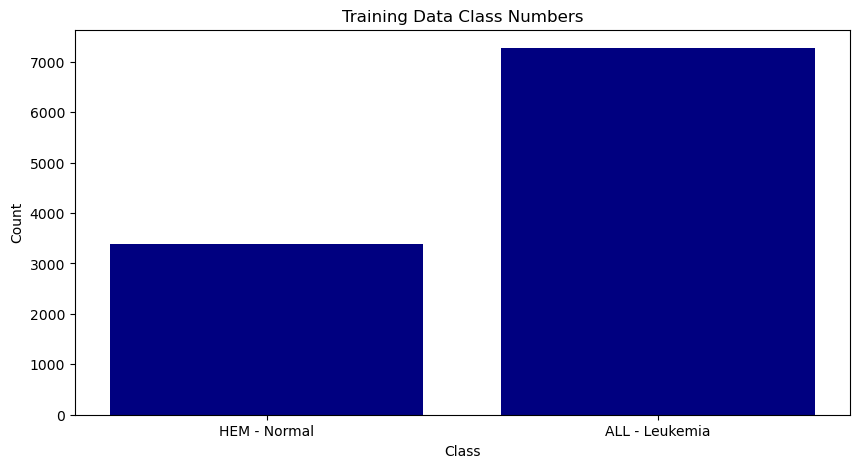

In [5]:
import matplotlib.pyplot as plt

# Data
data = {'HEM - Normal':total_hem_count, 'ALL - Leukemia':total_all_count}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='navy')
 
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Training Data Class Numbers")
plt.show()

* As we can see the dataset is not balanced.
* Lets print some example images from both classes:

In [9]:
!pip install opencv-python


                                              0.0/38.1 MB ? eta -:--:--
                                              0.0/38.1 MB 1.3 MB/s eta 0:00:30
                                              0.1/38.1 MB 1.1 MB/s eta 0:00:37
                                              0.2/38.1 MB 1.2 MB/s eta 0:00:33
                                              0.3/38.1 MB 1.8 MB/s eta 0:00:22
                                              0.6/38.1 MB 2.3 MB/s eta 0:00:17
                                              0.9/38.1 MB 2.9 MB/s eta 0:00:14
     -                                        1.2/38.1 MB 3.5 MB/s eta 0:00:11
     -                                        1.5/38.1 MB 3.9 MB/s eta 0:00:10
     -                                        1.6/38.1 MB 4.1 MB/s eta 0:00:09
     -                                        1.6/38.1 MB 4.1 MB/s eta 0:00:09
     --                                       1.9/38.1 MB 3.8 MB/s eta 0:00:10
     --                                       2.2/38.1 MB 3

Text(0.5, 1.0, 'HEM - Normal')

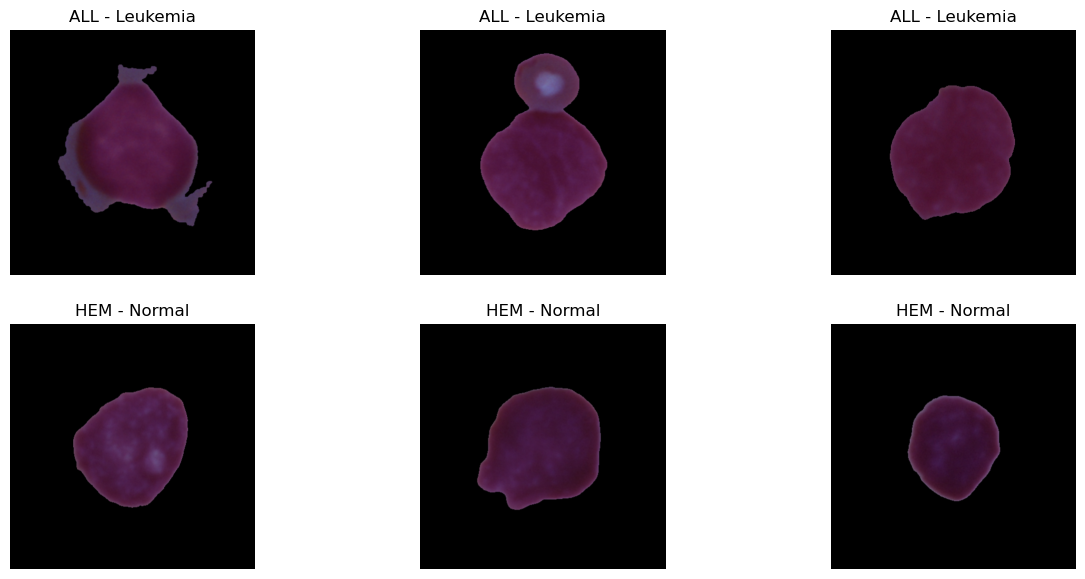

In [6]:
import cv2 as cv

im1_path = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/UID_16_29_1_all.bmp"
im2_path = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/UID_16_13_1_all.bmp"
im3_path = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/UID_16_11_1_all.bmp"
im4_path = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10_102_4_hem.bmp"
im5_path = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10_105_2_hem.bmp"
im6_path = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10_107_2_hem.bmp"


im1 = cv.imread(im1_path)
im2 = cv.imread(im2_path)
im3 = cv.imread(im3_path)
im4 = cv.imread(im4_path)
im5 = cv.imread(im5_path)
im6 = cv.imread(im6_path)

# Set figure
rows = 2
columns = 3
fig = plt.figure(figsize=(15, 7))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# im1
plt.imshow(im1)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# im2
plt.imshow(im2)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# im3
plt.imshow(im3)
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# im4
plt.imshow(im4)
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

#im4
plt.imshow(im5)
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

#im6
plt.imshow(im6)
plt.axis('off')
plt.title('HEM - Normal')

### Prepearing The Data

#### Importing the Training Data

In [7]:
# Get image paths

training_all_0 = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/all/"
training_hem_0 = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/hem/"
training_all_1 = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/"
training_hem_1 = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem/"
training_all_2 = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/all/"
training_hem_2 = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/hem/"
validation_data = "C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/"

In [8]:
# Import Train Data

import pandas as pd

image_paths = []
image_labels = []

for data_folder_path in [training_all_0,training_all_1,training_all_2,training_hem_0,training_hem_1,training_hem_2]:
    all_images_in_folder = os.listdir(data_folder_path)
    for image_path in all_images_in_folder:
        image_label = 1 if 'all' in data_folder_path else 0
        
        image_paths.append(data_folder_path + image_path)
        image_labels.append(image_label)
        
dict_train = {"image_paths":image_paths, "image_labels":image_labels}
df_train = pd.DataFrame(dict_train)

df_train

,image_paths,image_labels
0,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
1,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
2,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
3,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
4,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
...,...,...
10656,C:/Users/ASUS/Downloads/leukemia-classificatio...,0
10657,C:/Users/ASUS/Downloads/leukemia-classificatio...,0
10658,C:/Users/ASUS/Downloads/leukemia-classificatio...,0
10659,C:/Users/ASUS/Downloads/leukemia-classificatio...,0


Lets print again class counts for training data.
* We use 1 as ALL - Leukedia
* We use 0 as HEM - Normal

In [9]:
df_train['image_labels'].value_counts()

1    7272
0    3389
Name: image_labels, dtype: int64

#### Importing the Validation Data

In [10]:
# Get label csv
df_val = pd.read_csv('C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

# Drop Patient_ID column and rename columns
df_val['image_paths'] = df_val['new_names']
df_val['image_labels'] = df_val['labels']
df_val = df_val[['image_paths', 'image_labels']]

# Change image path from relative to full
df_val['image_paths'] = df_val['image_paths'].apply(lambda x: 'C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/'+x)
df_val

,image_paths,image_labels
0,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
1,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
2,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
3,C:/Users/ASUS/Downloads/leukemia-classificatio...,0
4,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
...,...,...
1862,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
1863,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
1864,C:/Users/ASUS/Downloads/leukemia-classificatio...,0
1865,C:/Users/ASUS/Downloads/leukemia-classificatio...,1


Lets print class counts for val data. Remember:
* We use 1 as ALL - Leukedia
* We use 0 as HEM - Normal

In [11]:
df_val['image_labels'].value_counts()

1    1219
0     648
Name: image_labels, dtype: int64

* Shuffle the data with spesific SEED

In [12]:
df_train = df_train.sample(frac=1, random_state=MAIN_SEED)
df_val = df_val.sample(frac=1, random_state=MAIN_SEED)

df_train

,image_paths,image_labels
6830,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
8600,C:/Users/ASUS/Downloads/leukemia-classificatio...,0
4080,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
3079,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
582,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
...,...,...
5734,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
5191,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
5390,C:/Users/ASUS/Downloads/leukemia-classificatio...,1
860,C:/Users/ASUS/Downloads/leukemia-classificatio...,1


#### Removing Black Areas From Data

Removing black areas will reduce the pixel count we have to deal when training or testing a model. We can consider this as deleting irrelevant features from dataset. This preprocess has a lot advantages:

* We need less memory to load images
* We need less features to train a model
* We need less memory to train model(less model weight number)
* Our model will learn faster because less irrelevant features.
* Out model will learn faster because less feature number(More features mean more process calc)

In [13]:
import numpy as np

def read_and_crop_image(image_path):
    # Read image
    print(f"Processing image: {image_path}")
    image = cv.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return None
    # Convert Color System from BGR(Blue, Green, Red) to GRAY
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # Aplly Otsu's Thresholding
    thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
    
    # Apply threshold
    result = cv.bitwise_and(image, image, mask=thresh)
    result[thresh==0] = [255,255,255] 
    (x, y, z_) = np.where(result > 0)
    mnx = (np.min(x))
    mxx = (np.max(x))
    mny = (np.min(y))
    mxy = (np.max(y))
    
    # Crop Image
    crop_img = image[mnx:mxx,mny:mxy,:]
    #resized_image = cv.resize(crop_img, (IMAGE_RESIZE_X, IMAGE_RESIZE_Y))
    
    # We can see resizing params as hyperparameters
    # This will determine sample feature count
    # Note: We keep Heigh/Width Ratio by Filling Black
    # Because just resizing will change cell shape structure
    border_v = 0
    border_h = 0
    if (IMAGE_RESIZE_Y/IMAGE_RESIZE_X) >= (crop_img.shape[0]/crop_img.shape[1]):
        border_v = int((((IMAGE_RESIZE_Y/IMAGE_RESIZE_X)*crop_img.shape[1])-crop_img.shape[0])/2)
    else:
        border_h = int((((IMAGE_RESIZE_Y/IMAGE_RESIZE_X)*crop_img.shape[0])-crop_img.shape[1])/2)
    
    crop_img = cv.copyMakeBorder(crop_img, border_v, border_v, border_h, border_h, cv.BORDER_CONSTANT, 0)
    resized_image = cv.resize(crop_img, (IMAGE_RESIZE_X, IMAGE_RESIZE_Y))
    
    # Return colorful image if KEEP_COLOR set
    if KEEP_COLOR:
        return resized_image
    else:
        return cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)
    
    return resized_image

* Before crop

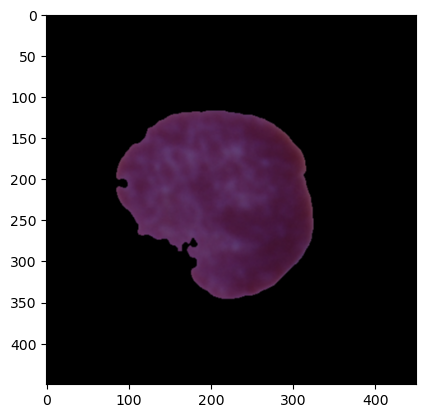

In [20]:
sample_path = df_train[:1]['image_paths'].values[0]

image = cv.imread(sample_path)
plt.imshow(image)
plt.show()

* After crop

Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/all/UID_68_35_10_all.bmp


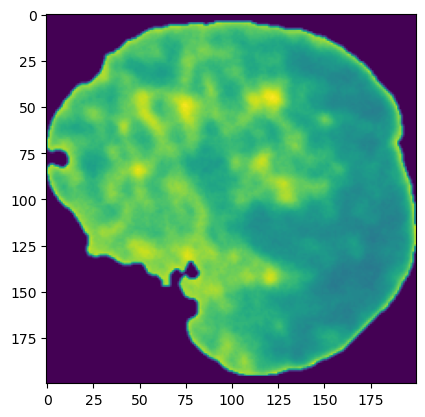

In [21]:
image = df_train[:1]['image_paths'].apply(read_and_crop_image).values[0]

plt.imshow(image)
plt.show()

In [22]:
if USE_LESS_DATA:
    df_train = df_train[:5000]
    df_val = df_val[:1000]

In [23]:
# Example: Print the first few image paths
print(df_train['image_paths'].head())


6830    C:/Users/ASUS/Downloads/leukemia-classificatio...
8600    C:/Users/ASUS/Downloads/leukemia-classificatio...
4080    C:/Users/ASUS/Downloads/leukemia-classificatio...
3079    C:/Users/ASUS/Downloads/leukemia-classificatio...
582     C:/Users/ASUS/Downloads/leukemia-classificatio...
Name: image_paths, dtype: object


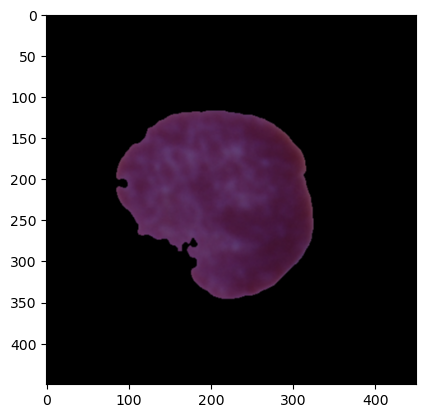

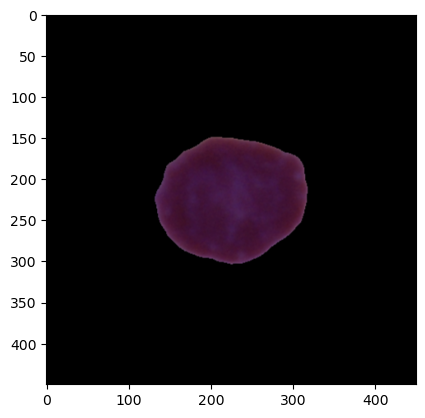

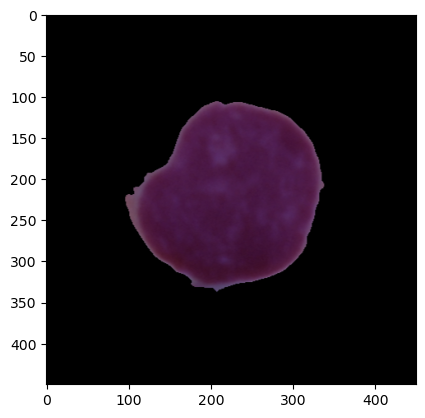

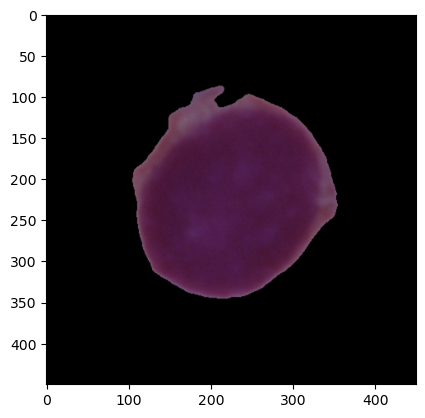

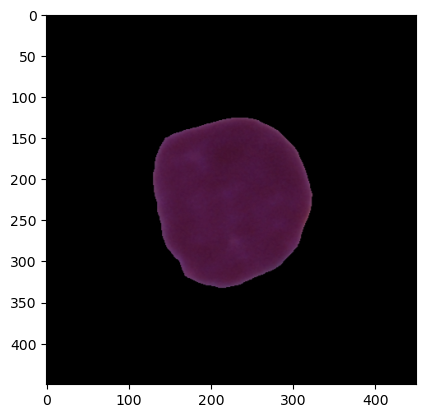

In [24]:
# Example: Print the first few images
for image_path in df_train['image_paths'].head():
    image = cv.imread(image_path)
    plt.imshow(image)
    plt.show()


In [25]:
# Apply Crop preprocess to all df_train and df_val

X_train = df_train['image_paths'].apply(read_and_crop_image).values
X_val = df_val['image_paths'].apply(read_and_crop_image).values

y_train = df_train['image_labels'].values
y_val = df_val['image_labels'].values

# https://stackoverflow.com/a/69873624
X_train = np.stack(X_train, axis=0)
X_val = np.stack(X_val, axis=0)

# Expand dim to add channel info if image has 1 channel(Colorless)
if not KEEP_COLOR:
    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)

# Delete non used variables
del(df_train)
del(df_val)

Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/all/UID_68_35_10_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10_166_3_hem.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/UID_51_104_1_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/UID_33_19_1_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/all/UID_26_25_1_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/UID_51_111_6_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/all/UID_48_35_6_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10

* We split train into train and test in order to get some test data
* If KEEP_COLOR param is True we will see 3 different channels in samples because 3 channels consist from 3 different matris RGB(Red, Green, Blue)
* So shape tells us --> (Sample Size, ImageX, ImageY, ChannelSize)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=MAIN_SEED)

print("X_train ->",X_train.shape,
      "\ny_train ->",y_train.shape,
      "\n\nX_test ->",X_test.shape,
      "\ny_test ->",y_test.shape,
      "\n\nX_val ->",X_val.shape,
      "\ny_val ->",y_val.shape
)

X_train -> (4500, 200, 200, 1) 
y_train -> (4500,) 

X_test -> (500, 200, 200, 1) 
y_test -> (500,) 

X_val -> (1000, 200, 200, 1) 
y_val -> (1000,)


### Prepairing Our First Model(Bare CNN) with Keras

#### Normalize Data

* Standart 8 bit color means pixels has values from 0 to 255.
* So we use min-max normalizer to normalize our features(pixels) from 0 to 1.

In [27]:
X_train = X_train / 255.0
X_val = X_val / 255.0

In [28]:
# We set input_shape
if len(X_train.shape) > 3:
    input_shape = X_train.shape[1:]
else:
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(200, 200, 1)

# Build First Model
We use basic CNN with L2, Dropout Regularizer. We also use BatchNormalization in our model

In [121]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [29]:
from keras import optimizers
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

first_model = Sequential()
first_model.add(Conv2D(filters = 2, kernel_size = (3,3),padding = 'same',activation ='relu', input_shape = input_shape))
first_model.add(Conv2D(filters = 4, kernel_size = (3,3),padding = 'same',activation ='relu'))
first_model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'same',activation ='relu'))
first_model.add(MaxPool2D(pool_size=(2,2)))
first_model.add(Dropout(0.5))
first_model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'same',activation ='relu'))
first_model.add(MaxPool2D(pool_size=(2,2)))
first_model.add(Conv2D(filters = 24, kernel_size = (7,7),padding = 'same',activation ='relu'))
first_model.add(Dropout(0.5))
first_model.add(Flatten())
first_model.add(Dense(64, kernel_regularizer=l2(1e-5), activation = "relu"))
first_model.add(BatchNormalization())
first_model.add(Dense(32, kernel_regularizer=l2(1e-5), activation = "relu"))
first_model.add(Dense(32, kernel_regularizer=l2(1e-5), activation = "relu"))
first_model.add(Dense(1, activation = "sigmoid"))

In [31]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'  # Adjust the path accordingly


In [33]:
plot_model(first_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


* This is our first model summary for first aproach

In [25]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 2)       20        
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 4)       76        
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 200, 8)       808       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 8)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 8)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 16)      3216      
                                                        

* Train model

In [26]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=LR)
first_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

first_model_trained = first_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs = EPOCH, validation_data = (X_val, y_val))

Epoch 1/20
141/141 [==============================] - 287s 2s/step - loss: 0.6123 - accuracy: 0.6938 - val_loss: 0.7724 - val_accuracy: 0.6620
Epoch 2/20
141/141 [==============================] - 226s 2s/step - loss: 0.5464 - accuracy: 0.7387 - val_loss: 0.7719 - val_accuracy: 0.5150
Epoch 3/20
141/141 [==============================] - 224s 2s/step - loss: 0.5300 - accuracy: 0.7524 - val_loss: 1.4152 - val_accuracy: 0.3370
Epoch 4/20
141/141 [==============================] - 209s 1s/step - loss: 0.4992 - accuracy: 0.7709 - val_loss: 1.7612 - val_accuracy: 0.3380
Epoch 5/20
141/141 [==============================] - 207s 1s/step - loss: 0.4895 - accuracy: 0.7713 - val_loss: 0.7718 - val_accuracy: 0.6340
Epoch 6/20
141/141 [==============================] - 204s 1s/step - loss: 0.4633 - accuracy: 0.7889 - val_loss: 0.8944 - val_accuracy: 0.5620
Epoch 7/20
141/141 [==============================] - 203s 1s/step - loss: 0.4374 - accuracy: 0.8042 - val_loss: 2.8670 - val_accuracy: 0.3380

* Lets print the loss and acc graphs

In [65]:
history_df = pd.DataFrame(first_model_trained.history)
history_df.to_csv('training_history.csv', index=False)

NameError: name 'first_model_trained' is not defined

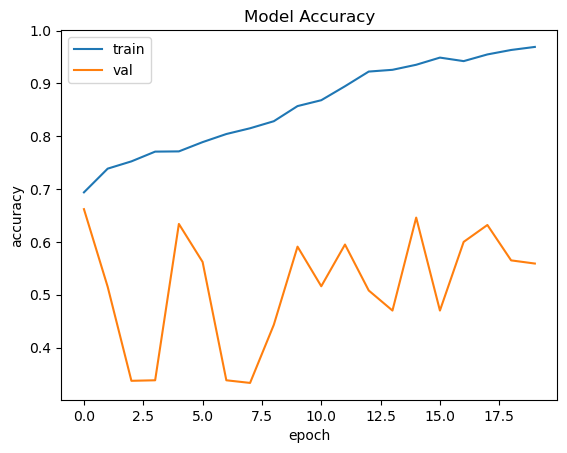

In [27]:
plt.plot(first_model_trained.history['accuracy'])
plt.plot(first_model_trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

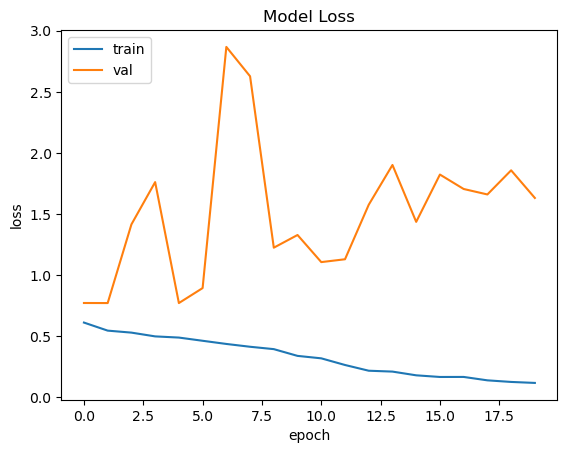

In [28]:
plt.plot(first_model_trained.history['loss'])
plt.plot(first_model_trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

* As we can see our first model is not able to achive a good score in terms of loss and acc even we able to prevent overfit.
* Lets try a different aproach.

#### Feature Extraction with pre-trained Model
* First we need to delete non used old variables to gain mem

In [29]:
del(first_model)
del(first_model_trained)
del(X_train)
del(X_test)
del(X_val)
del(y_train)
del(y_test)
del(y_val)

* Then we set hyperparameters for second aproach

In [109]:
PRETRAINED_MODEL = "ResNet50"  # Can be ResNet50, ResNet101 or VGG19
IMAGE_RESIZE_X = 224  # Image Width
IMAGE_RESIZE_Y = 224  # Image height
KEEP_COLOR = True  # Keep color in images

* We import the data again here.
* We use exactly same code that we use in first aproach to get train data.
* We won't need validaiton data for Standart ML models. So we not import it.

In [110]:
# Import Train Data
image_paths = []
image_labels = []
for data_folder_path in [training_all_0,training_all_1,training_all_2,training_hem_0,training_hem_1,training_hem_2]:
    all_images_in_folder = os.listdir(data_folder_path)
    for image_path in all_images_in_folder:
        image_label = 1 if 'all' in data_folder_path else 0
        
        image_paths.append(data_folder_path + image_path)
        image_labels.append(image_label)
        
dict_train = {"image_paths":image_paths, "image_labels":image_labels}
df_train = pd.DataFrame(dict_train)

# Shuffle data
df_train = df_train.sample(frac=1, random_state=MAIN_SEED)

# Apply Crop preprocess to all df_train and df_val
X_train = df_train['image_paths'].apply(read_and_crop_image).values
y_train = df_train['image_labels'].values

# https://stackoverflow.com/a/69873624
X_train = np.stack(X_train, axis=0)

# Expand dim to add channel info if image has 1 channel(Colorless)
if not KEEP_COLOR:
    X_train = np.expand_dims(X_train, axis=-1)

# Delete non used variables to gain mem space
del(df_train)

Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/all/UID_68_35_10_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10_166_3_hem.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/UID_51_104_1_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/UID_33_19_1_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/all/UID_26_25_1_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/UID_51_111_6_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/all/UID_48_35_6_all.bmp
Processing image: C:/Users/ASUS/Downloads/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem/UID_H10

* We import pre-trained models

In [112]:
y_train

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [114]:
# Save X_train and y_train to files
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)


In [3]:

from tensorflow.keras.applications import ResNet50, ResNet101

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [33]:
if PRETRAINED_MODEL == "ResNet50":
    second_model = ResNet50(weights='imagenet',include_top=False, pooling="max")
else:
    second_model = VGG19(weights='imagenet',include_top=False, pooling="avg")

*  After getting a pre-trained model we print our data shape right before getting tabular features to see the data we use as input to pre-trained model.

In [113]:
print("X_train ->",X_train.shape,
      "\ny_train ->",y_train.shape,
)

X_train -> (10661, 224, 224, 3) 
y_train -> (10661,)


In [36]:
# Get image features from pre-trained model

X_train = second_model.predict(X_train)

334/334 [==============================] - 1436s 4s/step


In [40]:
# Convert the features to a Pandas DataFrame
columns = [f'feature_{i+1}' for i in range(X_train.shape[1])]
features_extracted = pd.DataFrame(X_train, columns=columns)

# Display the DataFrame
print(features_extracted)

       feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      15.116117   0.000000   1.505850   0.000000   0.464283   0.000000   
1      11.190084   0.000000   1.272658   0.000000   1.050306   0.000000   
2      14.306766   0.000000   1.293709   0.786389   1.888574   0.000000   
3      16.915945   0.000000   1.590643   0.000000   0.512653   0.369569   
4      15.476833   0.000000   1.251602   0.000000   4.051040   0.000000   
...          ...        ...        ...        ...        ...        ...   
10656  13.115789   0.000000   2.704365   0.352219   0.845377   0.000000   
10657  17.391186   0.000000   1.084286   0.000000   0.000000   0.000000   
10658  15.239695   0.000000   0.000000   0.579625   0.166289   3.135090   
10659  12.521501   0.000000   2.105607   0.000000   0.000000   0.000000   
10660  13.839352   1.618331   0.000000   0.633664   0.135957   3.026062   

       feature_7  feature_8  feature_9  feature_10  ...  feature_2039  \
0       1.013850   0.00000

In [42]:
features_extracted.to_csv('features.csv', index=False)


* Now we able to extract tabular features from images
* Lets split our data and print our tabular features shapes

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=MAIN_SEED)

print("X_train ->",X_train.shape,
      "\ny_train ->",y_train.shape,
      "\n\nX_test ->",X_test.shape,
      "\ny_test ->",y_test.shape
)

X_train -> (9594, 224, 224, 3) 
y_train -> (9594,) 

X_test -> (1067, 224, 224, 3) 
y_test -> (1067,)


* The number of features may vary depending on the pre-trained model used. For example ResNet50 will extract 2048 features but VGG19 512.

#### Standart ML Model to Process Tabular Features
* First we need to install Lazy Classifier.

In [45]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.Collecting lazypredict
                                              0.0/1.3 MB ? eta -:--:--
                                              0.0/1.3 MB 660.6 kB/s eta 0:00:02
     --                                       0.1/1.3 MB 871.5 kB/s eta 0:00:02
     ------                                   0.2/1.3 MB 1.4 MB/s eta 0:00:01
     -------------                            0.4/1.3 MB 2.2 MB/s eta 0:00:01
     --------------------                     0.7/1.3 MB 2.7 MB/s eta 0:00:01
     ----------------------------             1.0/1.3 MB 3.4 MB/s eta 0:00:01
     ---------------------------------------  1.3/1.3 MB 3.8 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 3.6 MB/s eta 0:00:00
                                              0.0/99.8 MB ? eta -:--:--
                                              0.3/99.8 MB 8.6 MB/s eta 0:00:12
                                              0.4/99.8 MB 8.3 

* Then we just need to call it and give our data to Lazy Classifier

In [46]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, random_state=MAIN_SEED)
ml_models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|                                                                                           | 0/29 [04:26<?, ?it/s]


KeyboardInterrupt: 

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.applications import ResNet50
from keras.regularizers import l2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Additional Convolutional Layers
x = Conv2D(128, (3, 3), activation='relu')(base_model.output)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Global Average Pooling layer
x = GlobalAveragePooling2D()(x)

# Fully connected layers for feature extraction
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Output layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Create a new model
custom_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a learning rate schedule
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9
)
custom_model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

In [1]:
import numpy as np

# Load the X_train and y_train arrays
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

In [ ]:

# Train your custom model with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Fit the model using the data generator
custom_model_trained = custom_model.fit(
    datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=len(X_train) // BATCH_SIZE,
    epochs=EPOCH,
    
    verbose=1
)

Epoch 1/20
333/333 [==============================] - 1517s 5s/step - loss: 0.6922 - accuracy: 0.6658
Epoch 2/20
333/333 [==============================] - 1533s 5s/step - loss: 0.5900 - accuracy: 0.7264
Epoch 3/20
333/333 [==============================] - 1497s 4s/step - loss: 0.5580 - accuracy: 0.7482
Epoch 4/20
333/333 [==============================] - 1438s 4s/step - loss: 0.5412 - accuracy: 0.7623
Epoch 5/20
333/333 [==============================] - 1423s 4s/step - loss: 0.5174 - accuracy: 0.7721
Epoch 6/20
333/333 [==============================] - 1338s 4s/step - loss: 0.5059 - accuracy: 0.7792
Epoch 7/20
333/333 [==============================] - 1303s 4s/step - loss: 0.4904 - accuracy: 0.7889
Epoch 8/20
333/333 [==============================] - 1288s 4s/step - loss: 0.4823 - accuracy: 0.7903
Epoch 9/20
333/333 [==============================] - 1325s 4s/step - loss: 0.4723 - accuracy: 0.7937
Epoch 10/20
333/333 [==============================] - 1641s 5s/step - loss: 0.463

* We can print the results

### Final Results

As we can see we have achived 0.83 acc with second aproach